## EDA y Transformacion de datos
En este notebook se tomaran los archivos json que se encuentran en la carpeta Fuente_json que contienen informacion sobre ethereum y se les realizaran las transformaciones necesarias y el analisis respectivo, luego de esto los dataframes resultantes se exportaran a archivos .xlsx los cualses quedan almacenados el la carpera Datos_Procesados en la subcarpeta respectiva.

Creacion de dataframe a partir del archivo fuente .json

In [1]:
import json
import pandas as pd

# Cargar el JSON desde el archivo
with open('..\Data\Fuente_json\ethereum\coin_id_ethereum.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un nuevo diccionario para almacenar los datos no anidados
flat_data = {
    'id': data['id'],
    'symbol': data['symbol'],
    'name': data['name'],
    'block_time_in_minutes': data['block_time_in_minutes'],
    'hashing_algorithm': data['hashing_algorithm'],
    'description': data['description']['en'],
    'homepage': ', '.join(data['links']['homepage']),
    'reddit_subscribers': data['community_data']['reddit_subscribers'],
    'twitter_followers': data['community_data']['twitter_followers'],
    'github_repos': ', '.join(data['links']['repos_url']['github']),
    'last_updated': data['last_updated']
}

# Crear un DataFrame a partir de los datos no anidados
coin_id_ethereum1 = pd.DataFrame([flat_data])

# Imprimir el DataFrame
print(coin_id_ethereum1)

         id symbol      name  block_time_in_minutes hashing_algorithm  \
0  ethereum    eth  Ethereum                      0            Ethash   

                                         description  \
0  Ethereum is a global, open-source platform for...   

                        homepage  reddit_subscribers  twitter_followers  \
0  https://www.ethereum.org/, ,              2449714            3114854   

                                        github_repos              last_updated  
0  https://github.com/ethereum/go-ethereum, https...  2023-08-14T05:25:23.578Z  


hay columnas que no aportan valor para la clase de analisis que se va a realizar por lo que se eliminan estas columnas.

In [2]:
#Eliminar columnas
coin_id_ethereum1.drop(['homepage',"github_repos","last_updated","description"] , axis=1, inplace=True)

In [3]:
print(coin_id_ethereum1)

         id symbol      name  block_time_in_minutes hashing_algorithm  \
0  ethereum    eth  Ethereum                      0            Ethash   

   reddit_subscribers  twitter_followers  
0             2449714            3114854  


## grafico
para las categorias de block_time_in_minutes','reddit_subscribers','twitter_followers'

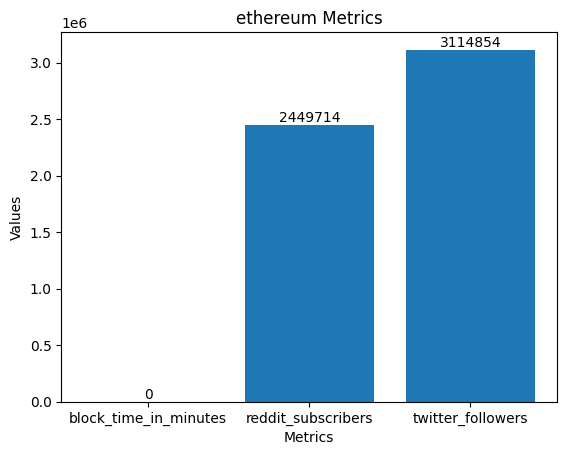

In [4]:
import matplotlib.pyplot as plt

# Datos del DataFrame
data = {
    'block_time_in_minutes': coin_id_ethereum1['block_time_in_minutes'][0],
    'reddit_subscribers': coin_id_ethereum1['reddit_subscribers'][0],
    'twitter_followers': coin_id_ethereum1['twitter_followers'][0]
}

# Crear una figura y ejes
fig, ax = plt.subplots()

# Crear el gráfico de barras
bars = ax.bar(data.keys(), data.values())

# Agregar etiquetas de datos en las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Configurar el título y etiquetas de los ejes
ax.set_title('ethereum Metrics')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')

# Mostrar el gráfico
plt.show()

exportacion del dataframe a archivo .xlsx

In [5]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_ethereum1.to_excel("..\Data\Datos_Procesados\ethereum\coin_id_ethereum1.xlsx", sheet_name="coin_id_ethereum1.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir del archivo fuente .json

In [6]:
# Cargar el JSON desde el archivo
with open('..\Data\Fuente_json\ethereum\coin_id_ethereum.json', 'r') as json_file:
    data = json.load(json_file)

# Función para aplanar diccionarios anidados
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

# Aplanar los datos anidados del JSON
flattened_data = flatten_dict(data)

# Crear un DataFrame a partir de los datos aplanados
coin_id_ethereum2 = pd.DataFrame([flattened_data])

# Imprimir el DataFrame
print(coin_id_ethereum2)

         id symbol      name asset_platform_id platforms_  \
0  ethereum    eth  Ethereum              None              

  detail_platforms__decimal_place detail_platforms__contract_address  \
0                            None                                      

   block_time_in_minutes hashing_algorithm  \
0                      0            Ethash   

                                          categories  ...  \
0  [Layer 1 (L1), Ethereum Ecosystem, Smart Contr...  ...   

  developer_data_pull_requests_merged  \
0                                5439   

  developer_data_pull_request_contributors  \
0                                      853   

  developer_data_code_additions_deletions_4_weeks_additions  \
0                                              14501          

  developer_data_code_additions_deletions_4_weeks_deletions  \
0                                             -14066          

  developer_data_commit_count_4_weeks  \
0                                  65   

  d

In [7]:
coin_id_ethereum2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 91 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   id                                                         1 non-null      object 
 1   symbol                                                     1 non-null      object 
 2   name                                                       1 non-null      object 
 3   asset_platform_id                                          0 non-null      object 
 4   platforms_                                                 1 non-null      object 
 5   detail_platforms__decimal_place                            0 non-null      object 
 6   detail_platforms__contract_address                         1 non-null      object 
 7   block_time_in_minutes                                      1 non-null      int64  
 8   hashing_algori

Valores faltantes

In [8]:
missing_values = coin_id_ethereum2.isnull().sum()
print(missing_values)

id                                                    0
symbol                                                0
name                                                  0
asset_platform_id                                     1
platforms_                                            0
                                                     ..
developer_data_last_4_weeks_commit_activity_series    0
public_interest_stats_alexa_rank                      0
public_interest_stats_bing_matches                    1
status_updates                                        0
last_updated                                          0
Length: 91, dtype: int64


Exportar dataframe a archivo .xlsx

In [9]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_ethereum2.to_excel("..\Data\Datos_Procesados\ethereum\coin_id_ethereum2.xlsx", sheet_name="coin_id_ethereum2.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir de archivo fuente .json

In [10]:
with open('..\Data\Fuente_json\ethereum\coin_id_market_chart_ethereum.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_market_chart_ethereum= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_market_chart_ethereum)


                        prices                          market_caps  \
0        [1438905600000, 2.83]                   [1438905600000, 0]   
1        [1438992000000, 1.33]            [1438992000000, 80339475]   
2        [1439164800000, 0.69]   [1439164800000, 41556309.21112176]   
3        [1439251200000, 1.07]  [1439251200000, 64539006.306272194]   
4        [1439337600000, 1.26]   [1439337600000, 76013261.05415402]   
...                        ...                                  ...   
2924  [1691625600000, 1855.89]  [1691625600000, 222992437544.13272]   
2925  [1691712000000, 1850.88]   [1691712000000, 222411268370.8958]   
2926  [1691798400000, 1847.54]  [1691798400000, 222019374228.76486]   
2927  [1691884800000, 1848.51]  [1691884800000, 222069758272.72742]   
2928  [1691953308000, 1853.72]  [1691953308000, 222686815715.63248]   

                            total_volumes  
0                  [1438905600000, 90622]  
1                 [1438992000000, 368070]  
2      [1439164

tratamiento de columnas como listas

In [11]:
# Descomponer las listas en columnas separadas
coin_id_market_chart_ethereum['timestamp'] = coin_id_market_chart_ethereum['prices'].apply(lambda x: x[0])
coin_id_market_chart_ethereum['price'] = coin_id_market_chart_ethereum['prices'].apply(lambda x: x[1])
coin_id_market_chart_ethereum['market_cap'] = coin_id_market_chart_ethereum['market_caps'].apply(lambda x: x[1])
coin_id_market_chart_ethereum['volume'] = coin_id_market_chart_ethereum['total_volumes'].apply(lambda x: x[1])

# Convertir los valores a tipos de datos adecuados
coin_id_market_chart_ethereum['timestamp'] = pd.to_datetime(coin_id_market_chart_ethereum['timestamp'], unit='ms')
coin_id_market_chart_ethereum['price'] = pd.to_numeric(coin_id_market_chart_ethereum['price'])
coin_id_market_chart_ethereum['market_cap'] = pd.to_numeric(coin_id_market_chart_ethereum['market_cap'])
coin_id_market_chart_ethereum['volume'] = pd.to_numeric(coin_id_market_chart_ethereum['volume'])

# Eliminar las columnas originales de listas
coin_id_market_chart_ethereum.drop(['prices', 'market_caps', 'total_volumes'], axis=1, inplace=True)

# Mostrar el DataFrame modificado
print(coin_id_market_chart_ethereum)

               timestamp    price    market_cap        volume
0    2015-08-07 00:00:00     2.83  0.000000e+00  9.062200e+04
1    2015-08-08 00:00:00     1.33  8.033948e+07  3.680700e+05
2    2015-08-10 00:00:00     0.69  4.155631e+07  4.004641e+05
3    2015-08-11 00:00:00     1.07  6.453901e+07  1.518998e+06
4    2015-08-12 00:00:00     1.26  7.601326e+07  2.073893e+06
...                  ...      ...           ...           ...
2924 2023-08-10 00:00:00  1855.89  2.229924e+11  6.010104e+09
2925 2023-08-11 00:00:00  1850.88  2.224113e+11  3.733538e+09
2926 2023-08-12 00:00:00  1847.54  2.220194e+11  3.694817e+09
2927 2023-08-13 00:00:00  1848.51  2.220698e+11  2.215987e+09
2928 2023-08-13 19:01:48  1853.72  2.226868e+11  2.084454e+09

[2929 rows x 4 columns]


transformacion de datos

In [12]:
# Convertir la columna 'timestamp' a tipo datetime
coin_id_market_chart_ethereum['timestamp'] = pd.to_datetime(coin_id_market_chart_ethereum['timestamp'])

# Obtener solo la fecha de la columna 'timestamp'
coin_id_market_chart_ethereum['timestamp'] = coin_id_market_chart_ethereum['timestamp'].dt.date

In [13]:
coin_id_market_chart_ethereum

,timestamp,price,market_cap,volume
0,2015-08-07,2.83,0.000000e+00,9.062200e+04
1,2015-08-08,1.33,8.033948e+07,3.680700e+05
2,2015-08-10,0.69,4.155631e+07,4.004641e+05
3,2015-08-11,1.07,6.453901e+07,1.518998e+06
4,2015-08-12,1.26,7.601326e+07,2.073893e+06
...,...,...,...,...
2924,2023-08-10,1855.89,2.229924e+11,6.010104e+09
2925,2023-08-11,1850.88,2.224113e+11,3.733538e+09
2926,2023-08-12,1847.54,2.220194e+11,3.694817e+09
2927,2023-08-13,1848.51,2.220698e+11,2.215987e+09


In [14]:
# cambiar nombre columna
coin_id_market_chart_ethereum.rename(columns={'timestamp': 'date'}, inplace=True)

In [15]:
print(coin_id_market_chart_ethereum)

            date    price    market_cap        volume
0     2015-08-07     2.83  0.000000e+00  9.062200e+04
1     2015-08-08     1.33  8.033948e+07  3.680700e+05
2     2015-08-10     0.69  4.155631e+07  4.004641e+05
3     2015-08-11     1.07  6.453901e+07  1.518998e+06
4     2015-08-12     1.26  7.601326e+07  2.073893e+06
...          ...      ...           ...           ...
2924  2023-08-10  1855.89  2.229924e+11  6.010104e+09
2925  2023-08-11  1850.88  2.224113e+11  3.733538e+09
2926  2023-08-12  1847.54  2.220194e+11  3.694817e+09
2927  2023-08-13  1848.51  2.220698e+11  2.215987e+09
2928  2023-08-13  1853.72  2.226868e+11  2.084454e+09

[2929 rows x 4 columns]


In [16]:
coin_id_market_chart_ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2929 non-null   object 
 1   price       2929 non-null   float64
 2   market_cap  2928 non-null   float64
 3   volume      2929 non-null   float64
dtypes: float64(3), object(1)
memory usage: 91.7+ KB


## Grafico
para evidenciar outliers

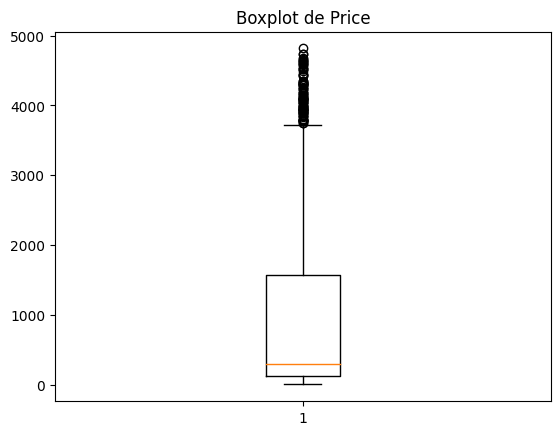

In [17]:
import matplotlib.pyplot as plt
plt.boxplot(coin_id_market_chart_ethereum['price'])
plt.title('Boxplot de Price')
plt.show()

## Grafico de lineas dobles
para evidenciar como han evolucionado entre si el precio y la capitalizacion del mercado

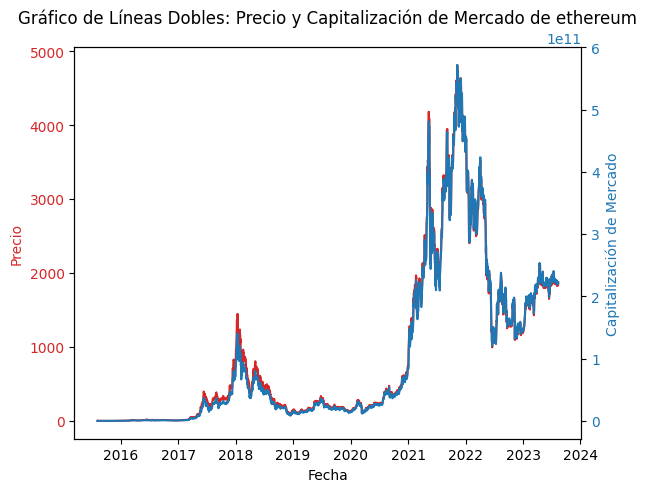

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_ethereum['date'] = pd.to_datetime(coin_id_market_chart_ethereum['date'])

# Crear el gráfico de líneas dobles
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio', color=color)
ax1.plot(coin_id_market_chart_ethereum['date'], coin_id_market_chart_ethereum['price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Segundo eje y
color = 'tab:blue'
ax2.set_ylabel('Capitalización de Mercado', color=color)
ax2.plot(coin_id_market_chart_ethereum['date'], coin_id_market_chart_ethereum['market_cap'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Ajustar el diseño del gráfico
plt.title('Gráfico de Líneas Dobles: Precio y Capitalización de Mercado de ethereum')
plt.show()

## Gráfico de Retorno Diario
Para calcular los retornos diarios del precio y vizulalizar cómo varían en función de los días.

C:\Users\Gio\AppData\Local\Temp\ipykernel_11412\2604506085.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()


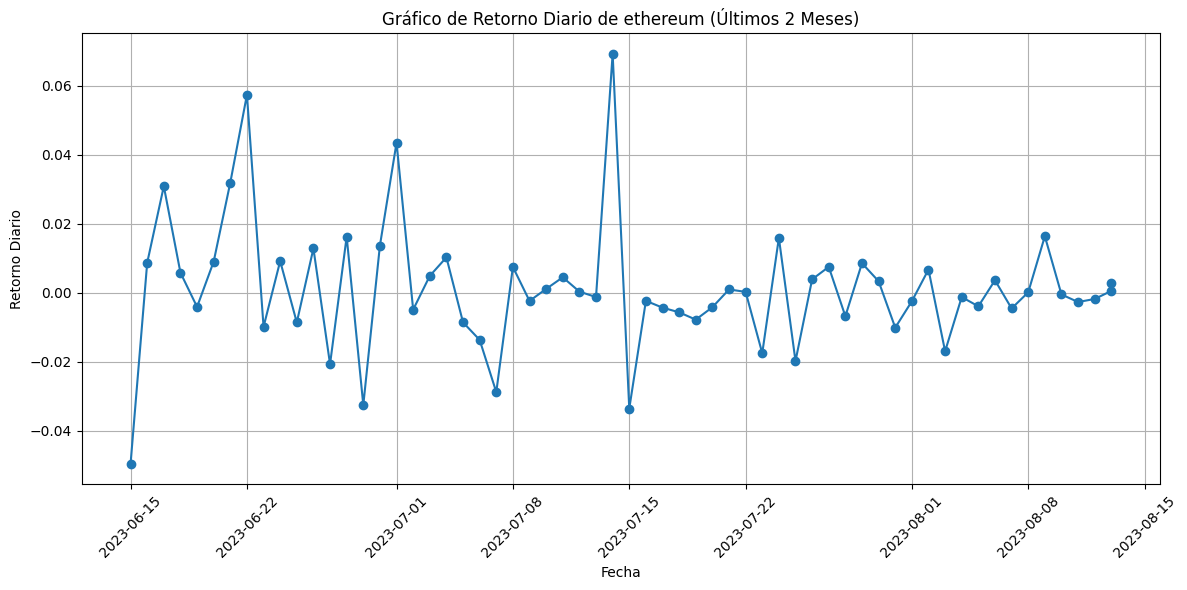

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_ethereum['date'] = pd.to_datetime(coin_id_market_chart_ethereum['date'])

# Obtener la fecha actual
current_date = pd.to_datetime('2023-08-14')  # Cambia la fecha a la actual si es necesario

# Calcular la fecha 6 meses antes de la fecha actual
six_months_ago = current_date - pd.DateOffset(months=2)

# Filtrar los datos para los últimos 6 meses
data_last_6_months = coin_id_market_chart_ethereum[
    (coin_id_market_chart_ethereum['date'] >= six_months_ago) &
    (coin_id_market_chart_ethereum['date'] <= current_date)
]

# Calcular los retornos diarios del precio
data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()

# Crear el gráfico de retorno diario
plt.figure(figsize=(12, 6))
plt.plot(data_last_6_months['date'], data_last_6_months['daily_return'], marker='o')
plt.title('Gráfico de Retorno Diario de ethereum (Últimos 2 Meses)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Gráfico de Precios y Volumen
Se combinan dos series de datos en un solo gráfico para ver cómo los precios y el volumen de negociación están relacionados.

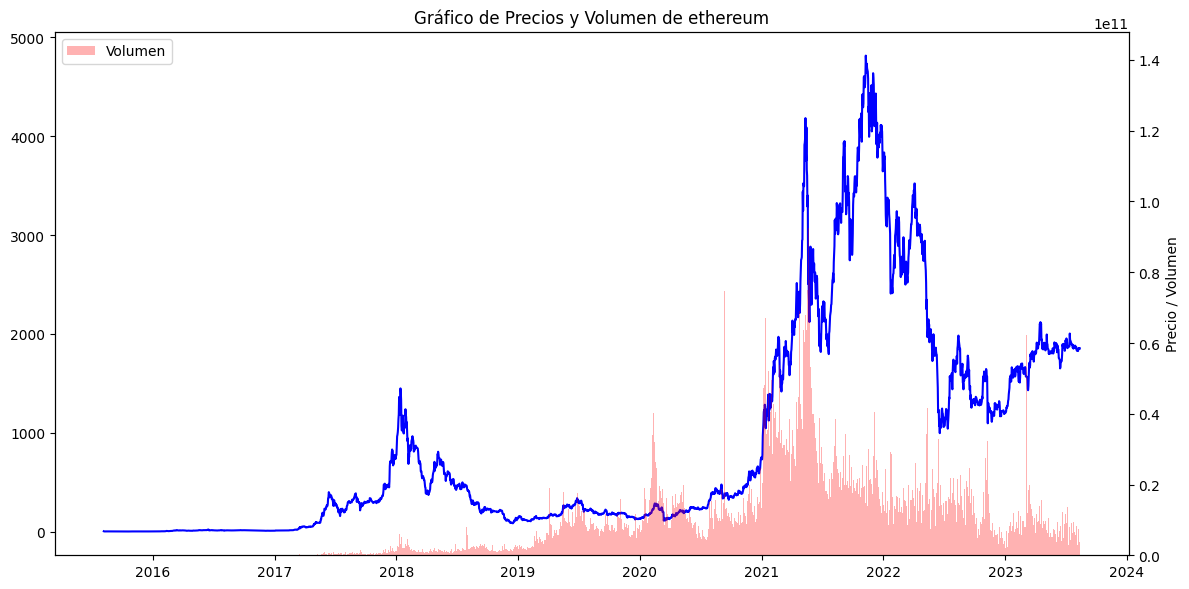

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_ethereum['date'] = pd.to_datetime(coin_id_market_chart_ethereum['date'])

# Crear el gráfico de precios y volumen combinados
plt.figure(figsize=(12, 6))

# Gráfico de precios (línea azul)
plt.plot(coin_id_market_chart_ethereum['date'], coin_id_market_chart_ethereum['price'], color='blue', label='Precio')

# Crear un segundo eje y para el volumen
plt.gca().twinx()

# Gráfico de volumen (barra roja)
plt.bar(coin_id_market_chart_ethereum['date'], coin_id_market_chart_ethereum['volume'], color='red', alpha=0.3, label='Volumen')

plt.title('Gráfico de Precios y Volumen de ethereum')
plt.xlabel('Fecha')
plt.ylabel('Precio / Volumen')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [21]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_market_chart_ethereum.to_excel("..\Data\Datos_Procesados\ethereum\coin_id_market_chart_ethereum.xlsx", sheet_name="coin_id_market_chart_ethereum.xlsx", index=False, float_format="%.2f")

d:\Programs Instalds\Python\Program Instald\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [22]:
with open('..\Data\Fuente_json\ethereum\coin_id_ohlc_ethereum.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_ohlc_ethereum= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_ohlc_ethereum)

                 0        1        2        3        4
0    1438905600000     2.83     2.83     2.83     2.83
1    1439251200000     1.33     1.33     0.69     1.07
2    1439596800000     1.26     1.83     1.26     1.67
3    1439942400000     1.48     1.48     1.20     1.25
4    1440288000000     1.48     1.48     1.36     1.36
..             ...      ...      ...      ...      ...
760  1690761600000  1858.78  1880.92  1858.78  1861.87
761  1691020800000  1857.28  1869.75  1838.01  1838.01
762  1691366400000  1835.70  1835.70  1826.71  1826.71
763  1691712000000  1826.93  1856.84  1826.93  1850.88
764  1692057600000  1847.54  1848.51  1839.51  1839.51

[765 rows x 5 columns]


In [23]:
coin_id_ohlc_ethereum[0] = pd.to_datetime(coin_id_ohlc_ethereum[0], unit='ms')

In [24]:
# cambiar nombre columna
coin_id_ohlc_ethereum.rename(columns={'date': 'Date', 1:'Open', 2:'High', 3:'Low', 4:'Close'}, inplace=True)

In [25]:
coin_id_ohlc_ethereum

,0,Open,High,Low,Close
0,2015-08-07,2.83,2.83,2.83,2.83
1,2015-08-11,1.33,1.33,0.69,1.07
2,2015-08-15,1.26,1.83,1.26,1.67
3,2015-08-19,1.48,1.48,1.20,1.25
4,2015-08-23,1.48,1.48,1.36,1.36
...,...,...,...,...,...
760,2023-07-31,1858.78,1880.92,1858.78,1861.87
761,2023-08-03,1857.28,1869.75,1838.01,1838.01
762,2023-08-07,1835.70,1835.70,1826.71,1826.71
763,2023-08-11,1826.93,1856.84,1826.93,1850.88


In [26]:
coin_id_ohlc_ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       765 non-null    datetime64[ns]
 1   Open    765 non-null    float64       
 2   High    765 non-null    float64       
 3   Low     765 non-null    float64       
 4   Close   765 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 30.0 KB


In [27]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_ohlc_ethereum.to_excel("..\Data\Datos_Procesados\ethereum\coin_id_ohlc_ethereum.xlsx", sheet_name="coin_id_ohlc_ethereum.xlsx", index=False, float_format="%.2f")

In [28]:
with open('..\Data\Fuente_json\ethereum\companies_public_treasure_ethereum.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
companies_public_treasure_ethereum= pd.DataFrame(data)

# Imprimir el DataFrame
print(companies_public_treasure_ethereum)

   total_holdings  total_value_usd  market_cap_dominance  \
0         80026.1     1.481182e+08                  0.07   
1         80026.1     1.481182e+08                  0.07   
2         80026.1     1.481182e+08                  0.07   

                                           companies  
0  {'name': 'Coinbase Global, Inc', 'symbol': 'NA...  
1  {'name': 'Meitu', 'symbol': 'HKG:1357', 'count...  
2  {'name': 'Mogo Inc.', 'symbol': 'NASDAQ:MOGO',...  


In [29]:
# Crear un nuevo DataFrame a partir de la columna "companies"
companies_public_treasure_ethereum2 = pd.DataFrame(companies_public_treasure_ethereum['companies'].tolist())

# Mostrar el nuevo DataFrame
print(companies_public_treasure_ethereum2)

                   name       symbol country  total_holdings  \
0  Coinbase Global, Inc  NASDAQ:COIN      US           48880   
1                 Meitu     HKG:1357      HK           31000   
2             Mogo Inc.  NASDAQ:MOGO      CA             146   

   total_entry_value_usd  total_current_value_usd  percentage_of_total_supply  
0              165400000                 90470880                       0.041  
1               50500000                 57377077                       0.026  
2                 405880                   270227                       0.000  


In [30]:
companies_public_treasure_ethereum2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        3 non-null      object 
 1   symbol                      3 non-null      object 
 2   country                     3 non-null      object 
 3   total_holdings              3 non-null      int64  
 4   total_entry_value_usd       3 non-null      int64  
 5   total_current_value_usd     3 non-null      int64  
 6   percentage_of_total_supply  3 non-null      float64
dtypes: float64(1), int64(3), object(3)
memory usage: 296.0+ bytes


## Gráfico de Barras
Para visualizar la distribución de las empresas por país y la cantidad total de holdings que tienen en la criptomoneda.

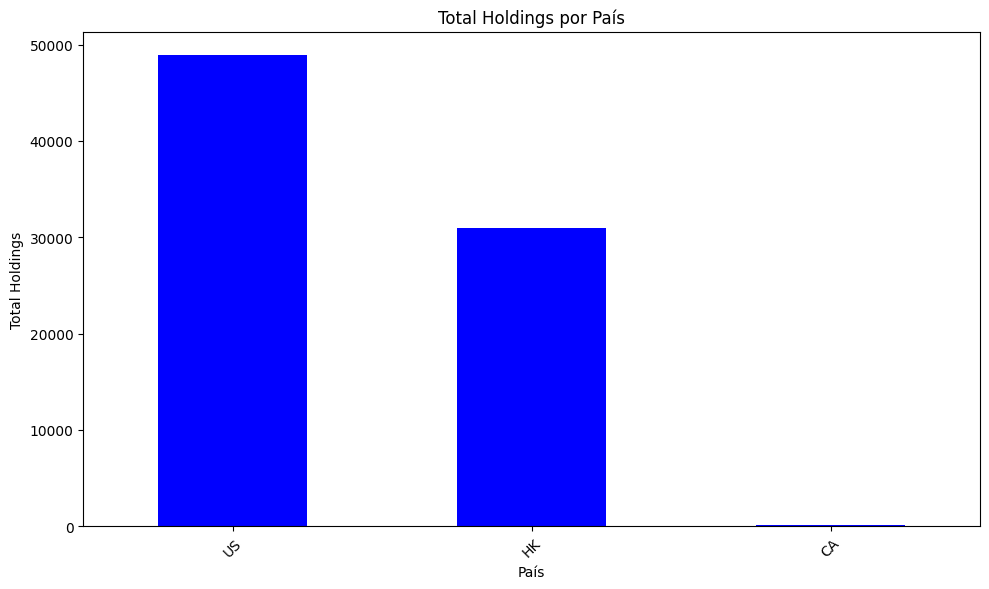

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por país y calcular la suma de total_holdings
holdings_by_country = companies_public_treasure_ethereum2.groupby('country')['total_holdings'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
holdings_by_country.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Total Holdings por País')
plt.xlabel('País')
plt.ylabel('Total Holdings')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Gráfico de Barras
Para visualiza que porcentaje total del suministro de la criptomoneda posee la empresa.

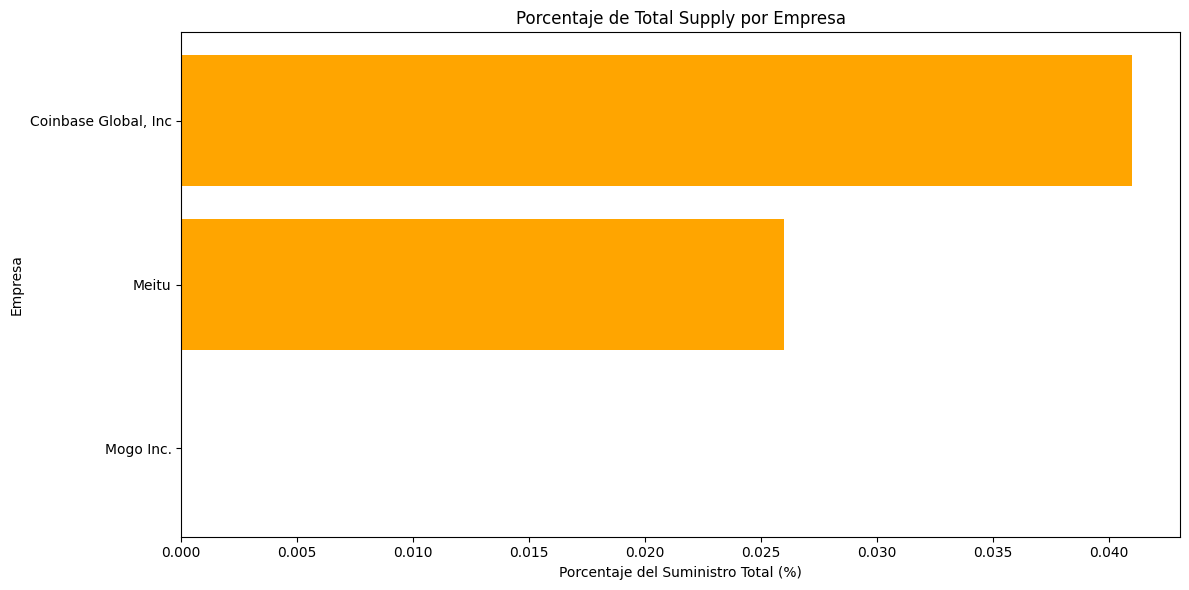

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el gráfico de barras para el porcentaje de total supply por empresa
plt.figure(figsize=(12, 6))
plt.barh(companies_public_treasure_ethereum2['name'], companies_public_treasure_ethereum2['percentage_of_total_supply'], color='orange')
plt.title('Porcentaje de Total Supply por Empresa')
plt.xlabel('Porcentaje del Suministro Total (%)')
plt.ylabel('Empresa')
plt.gca().invert_yaxis()  # Invertir el eje y para que las empresas con mayor porcentaje estén arriba
plt.tight_layout()

plt.show()

In [33]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
companies_public_treasure_ethereum2.to_excel("..\Data\Datos_Procesados\ethereum\companies_public_treasure_ethereum2.xlsx", sheet_name="companies_public_treasure_ethereum2.xlsx", index=False, float_format="%.2f")

d:\Programs Instalds\Python\Program Instald\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [34]:
# Crear un nuevo DataFrame con las columnas restantes
companies_public_treasure_ethereum1 = companies_public_treasure_ethereum.drop(columns=['companies'])

# Mostrar el nuevo DataFrame
print(companies_public_treasure_ethereum1)

   total_holdings  total_value_usd  market_cap_dominance
0         80026.1     1.481182e+08                  0.07
1         80026.1     1.481182e+08                  0.07
2         80026.1     1.481182e+08                  0.07


In [35]:
companies_public_treasure_ethereum1 = companies_public_treasure_ethereum1.drop_duplicates()

In [36]:
companies_public_treasure_ethereum1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_holdings        1 non-null      float64
 1   total_value_usd       1 non-null      float64
 2   market_cap_dominance  1 non-null      float64
dtypes: float64(3)
memory usage: 32.0 bytes


In [37]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
companies_public_treasure_ethereum1.to_excel("..\Data\Datos_Procesados\ethereum\companies_public_treasure_ethereum1.xlsx", sheet_name="companies_public_treasure_ethereum1.xlsx", index=False, float_format="%.2f")

d:\Programs Instalds\Python\Program Instald\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
